# Exploratory data analysis (EDA) of apartments data

## Libraries and settings

In [264]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_04


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [265]:
# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv")[['web-scraper-order',
                                                        'address_raw',
                                                        'lat',
                                                        'lon',
                                                        'bfs_number',
                                                        'bfs_name',
                                                        'rooms', 
                                                        'area', 
                                                        'luxurious', 
                                                        'price', 
                                                        'price_per_m2',
                                                        'pop',
                                                        'pop_dens',
                                                        'emp',
                                                        'frg_pct',
                                                        'mean_taxable_income']]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49.0,0,1441.0,29.41,12286,1221.272366,5053.0,24.841283,65362.042683
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111.0,0,2600.0,23.42,12286,1221.272366,5053.0,24.841283,65362.042683
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58.0,0,1490.0,25.69,12286,1221.272366,5053.0,24.841283,65362.042683
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118.0,0,3240.0,27.46,12286,1221.272366,5053.0,24.841283,65362.042683
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66.0,0,1450.0,21.97,12286,1221.272366,5053.0,24.841283,65362.042683


### Quantiles original values

In [266]:
df_orig[['price','rooms', 'area', 'price_per_m2', 'pop_dens']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,price,rooms,area,price_per_m2,pop_dens
0.05,1337.00,1.00,26.00,17.90,336.03
0.10,1492.50,1.50,41.50,20.02,525.66
0.25,1842.25,2.50,63.00,23.30,1044.63
0.50,2391.00,3.50,86.00,27.95,1662.60
0.75,3056.75,4.50,108.75,38.12,4778.99
0.90,3960.00,4.75,140.50,52.78,4778.99
0.95,4957.50,5.50,163.75,67.33,4778.99


Task 2 b)

In [267]:

# Entferne Ausreisser am unteren Rand

subset_untere = df_orig.loc[(df_orig['area'] > 25.0) & (df_orig['price_per_m2'] > 17.0) & (df_orig['price'] > 1300.0)]

# Entfernen von Ausreißern am oberen Rand
df_orig = subset_untere.loc[(df_orig['area'] < 165.0) & (df_orig['price_per_m2'] < 68.0) & (df_orig['price'] < 5000.0)]


### Filter apartments

In [268]:
# Filter apartments (replace '<= 5000' by the respective operator and quantile)
df = df_orig.loc[df_orig['pop_dens'] <= 5000]

### Shape (number of rows and colums)

In [269]:
# Number of rows and columns
print(df.shape)

(645, 16)


### Data types

In [270]:
df.dtypes

web-scraper-order       object
address_raw             object
lat                    float64
lon                    float64
bfs_number               int64
bfs_name                object
rooms                  float64
area                   float64
luxurious                int64
price                  float64
price_per_m2           float64
pop                      int64
pop_dens               float64
emp                    float64
frg_pct                float64
mean_taxable_income    float64
dtype: object

### Summary statistics of numeric variables

In [271]:
df.describe()

,lat,lon,bfs_number,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,47.407755,8.603754,181.970543,3.450388,87.393798,0.009302,2491.815504,30.104806,144885.386047,2371.263991,157643.164341,27.701519,79899.708242
std,0.086858,0.121345,81.729561,1.063520,28.049645,0.096073,763.273919,9.580663,180398.496698,1693.502141,216015.040787,7.557804,13615.692894
min,47.195290,8.367652,1.000000,1.000000,26.000000,0.000000,1307.000000,17.180000,698.000000,87.959866,129.000000,7.669214,62000.541872
25%,47.359154,8.514894,118.000000,2.500000,66.000000,0.000000,1898.000000,23.440000,8775.000000,1016.354344,2946.000000,24.535004,70118.996920
50%,47.398655,8.568728,223.000000,3.500000,86.000000,0.000000,2390.000000,27.140000,24990.000000,1662.597326,18911.000000,28.032004,79504.517343
75%,47.482018,8.716511,261.000000,4.500000,104.000000,0.000000,2940.000000,33.920000,420217.000000,4778.994655,491193.000000,32.458468,82932.737704
max,47.691204,8.915933,298.000000,6.500000,164.000000,1.000000,4990.000000,67.390000,420217.000000,4778.994655,491193.000000,46.226483,174434.537050


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [272]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Area
print('Area:',
      'Count:', round(df.area.count(), 1),
      'Min:', round(df.area.min(), 1),
      'Max:', round(df.area.max(), 1),
      'Mean:', round(df.area.mean(), 1),
      'Median:', round(df.area.median(), 1),
      'Std:', round(df.area.std(), 1))

Price: Count: 645 Min: 1307.0 Max: 4990.0 Mean: 2491.8 Median: 2390.0 Std: 763.3
Area: Count: 645 Min: 26.0 Max: 164.0 Mean: 87.4 Median: 86.0 Std: 28.0


### Skewness

In [273]:
df[['price','rooms', 'area']].skew()

price    0.849824
rooms    0.052434
area     0.351038
dtype: float64

### Kurtosis

In [274]:
df[['price','rooms', 'area']].kurtosis()

price    0.438108
rooms   -0.151205
area    -0.219860
dtype: float64

### Extreme values

In [275]:
# Low costs apartments
df[df['price_per_m2'] <= 10]

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income


In [276]:
# Very expansive apartments
df[df['price_per_m2'] >= 100]

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income


### Get a list of categories of categorical variable

In [277]:
np.array(pd.Categorical(df['bfs_name']).categories)

array(['Adliswil', 'Aeugst am Albis', 'Affoltern am Albis', 'Altikon',
       'Andelfingen', 'Bachenbülach', 'Bassersdorf', 'Bauma',
       'Bonstetten', 'Bülach', 'Dielsdorf', 'Dietikon', 'Dietlikon',
       'Dübendorf', 'Dürnten', 'Egg', 'Eglisau', 'Elsau', 'Embrach',
       'Fehraltorf', 'Feuerthalen', 'Freienstein-Teufen', 'Fällanden',
       'Glattfelden', 'Gossau (ZH)', 'Greifensee', 'Hedingen',
       'Hettlingen', 'Hinwil', 'Hittnau', 'Hochfelden', 'Hombrechtikon',
       'Höri', 'Hüttikon', 'Kloten', 'Knonau', 'Küsnacht (ZH)',
       'Langnau am Albis', 'Laufen-Uhwiesen', 'Lindau', 'Lufingen',
       'Maur', 'Meilen', 'Mettmenstetten', 'Männedorf', 'Mönchaltorf',
       'Neerach', 'Neftenbach', 'Niederglatt', 'Niederhasli',
       'Niederweningen', 'Nürensdorf', 'Oberengstringen', 'Oberglatt',
       'Obfelden', 'Oetwil am See', 'Oetwil an der Limmat', 'Opfikon',
       'Ossingen', 'Pfungen', 'Pfäffikon', 'Regensdorf', 'Rheinau',
       'Richterswil', 'Rickenbach (ZH)', 'Rorba

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [278]:
pd.crosstab(df['luxurious'], df['rooms'])

rooms,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5
luxurious,,,,,,,,,,,,
0,15,20,33,125,42,191,26,145,3,33,1,5
1,0,0,0,5,0,1,0,0,0,0,0,0


### Pivot tables

In [279]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['rooms', 'price', 'price_per_m2', 'area', 'luxurious']],
               index=['rooms', 'luxurious'],
               values=['price', 'price_per_m2', 'area'],
               aggfunc=(np.mean, 'count'))

area             price              price_per_m2           
                count        mean count         mean        count       mean
rooms luxurious                                                             
1.0   0            15   57.466667    15  1889.133333           15  40.964000
1.5   0            20   42.800000    20  1958.050000           20  47.460000
2.0   0            33   57.121212    33  1952.606061           33  35.188788
2.5   0           125   67.240000   125  2249.776000          125  34.541280
      1             5   71.600000     5  2627.400000            5  36.774000
3.0   0            42   67.642857    42  1998.119048           42  29.290952
3.5   0           191   88.507853   191  2531.890052          191  28.854921
      1             1  105.000000     1  3410.000000            1  32.480000
4.0   0            26   93.346154    26  2880.230769           26  30.733846
4.5   0           145  110.731034   145  2743.158621          145  24.836069
5.0   0             3  108.000000     3  2881.666667            3  26.376667
5.5   0            33  135.363636    33  3136.666667           33  23.216061
6.0   0             1  150.000000     1  4800.000000            1  32.000000
6.5   0             5  145.600000     5  4081.400000            5  27.924000

### Correlation matrix

In [280]:
corr = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov().corr()
corr

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.000000,0.984169,0.040586,-0.770631,-0.824080,-0.861223
area,0.984169,1.000000,0.216975,-0.645532,-0.710640,-0.757520
price,0.040586,0.216975,1.000000,0.605474,0.532449,0.472687
price_per_m2,-0.770631,-0.645532,0.605474,1.000000,0.995961,0.987425
pop_dens,-0.824080,-0.710640,0.532449,0.995961,1.000000,0.997602
frg_pct,-0.861223,-0.757520,0.472687,0.987425,0.997602,1.000000


### Covariance matrix

In [281]:
cov = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov()
cov

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.131075,23.551400,350.946578,-4.936485,-5.949532e+02,-1.843172
area,23.551400,786.782570,12784.324320,-139.362796,-1.366437e+04,-44.769132
price,350.946578,12784.324320,582587.076157,2260.466463,3.794787e+05,523.441462
price_per_m2,-4.936485,-139.362796,2260.466463,91.789099,1.032317e+04,23.267704
pop_dens,-594.953174,-13664.366552,379478.653019,10323.174388,2.867950e+06,8117.005366
frg_pct,-1.843172,-44.769132,523.441462,23.267704,8.117005e+03,57.120408


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

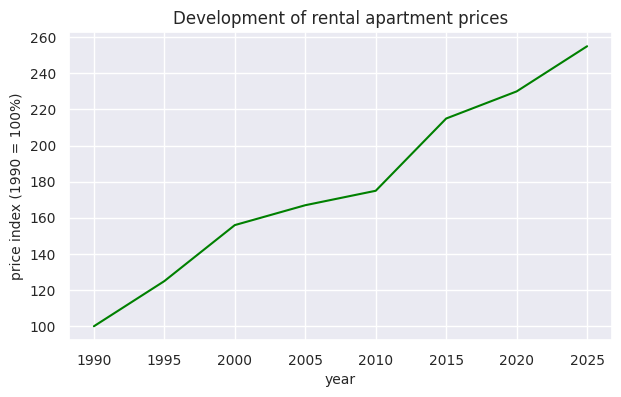

In [282]:
# Generate some useful values (time series)
x = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]
y = [100, 125, 156, 167, 175, 215, 230, 255]

# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="green")
plt.title('Development of rental apartment prices', fontsize=12)
plt.xlabel('year', fontsize=10)
plt.ylabel('price index (1990 = 100%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Boxplot (seaborn)

<Axes: xlabel='area'>

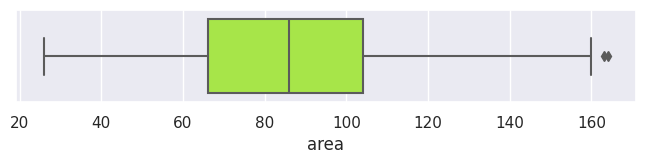

In [283]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['area'], color="greenyellow")

### Histogram  (matplotlib)

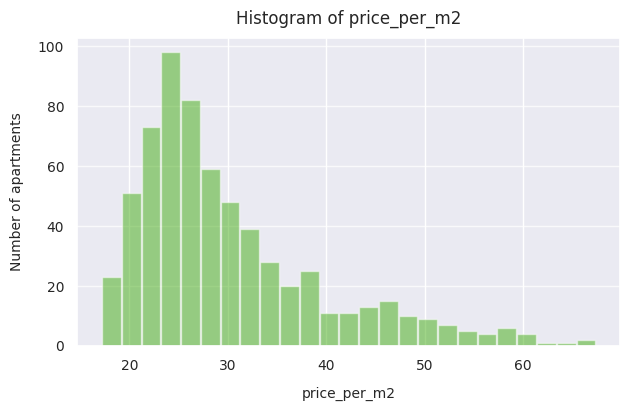

In [284]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['price_per_m2'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price_per_m2', fontsize=10, labelpad=10)
plt.ylabel('Number of apartments', fontsize=10, labelpad=10)
plt.title('Histogram of price_per_m2', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Density plot  (seaborn)

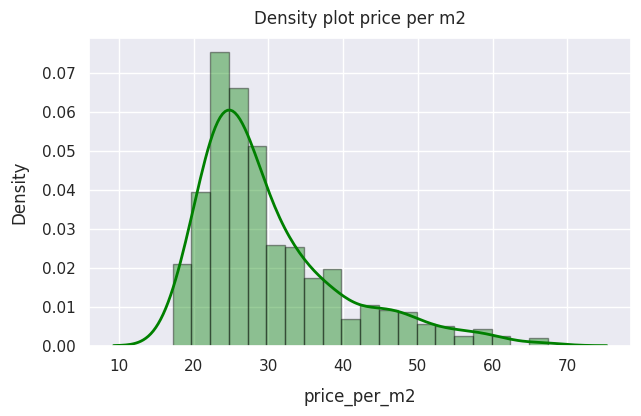

In [285]:
plt.figure(figsize=(7,4))
sns.distplot(df['price_per_m2'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot price per m2', fontsize=12, pad=10)
plt.xlabel('price_per_m2', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot

      area       var
427   26.0 -2.188755
195   26.0 -2.188755
204   26.0 -2.188755
459   26.0 -2.188755
95    28.0 -2.117453
..     ...       ...
699  160.0  2.588489
304  160.0  2.588489
546  160.0  2.588489
392  163.0  2.695442
710  164.0  2.731093

[645 rows x 2 columns]


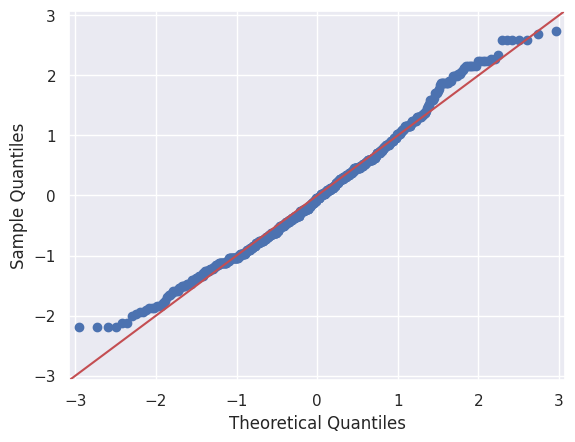

In [286]:
# Variable (standardized)
x = 'area'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['area', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

### Barchart  (matplotlib)

In [287]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
index

[6.0, 5.0, 6.5, 1.0, 1.5, 4.0, 2.0, 5.5, 3.0, 2.5, 4.5, 3.5]

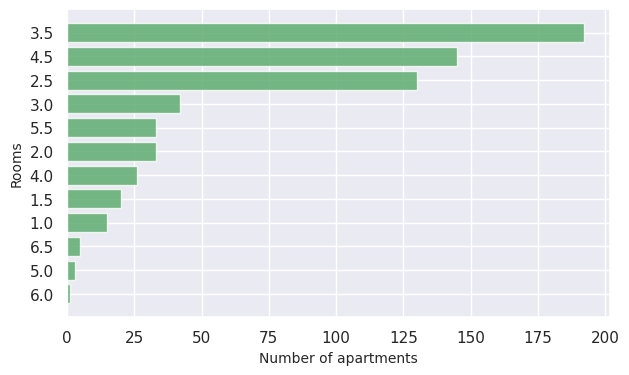

In [288]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of apartments', fontsize=10)
ax.set_ylabel('Rooms', fontsize=10)

# Show graph
plt.show()

### Piechart (matplotlib)

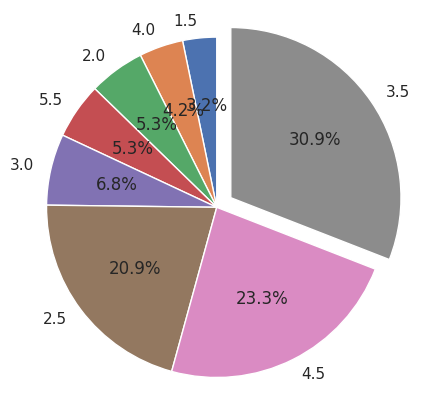

In [289]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df.rooms.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0.0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

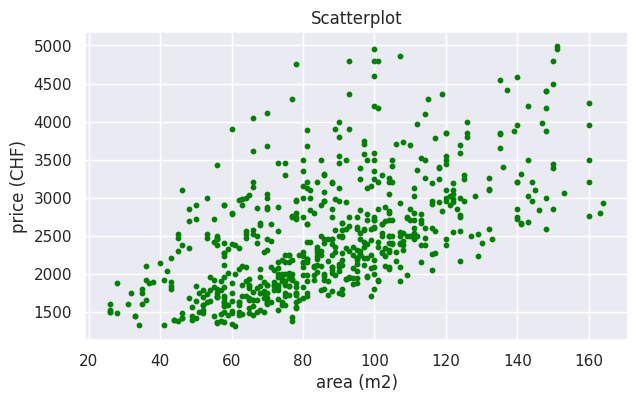

In [290]:
plt.figure(figsize=(7,4))
plt.scatter(df['area'], 
           df['price'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')
plt.show()

### Scatterplot (matplotlib) with regression line

(645, 17)
16.24886570253912
1071.765409633445


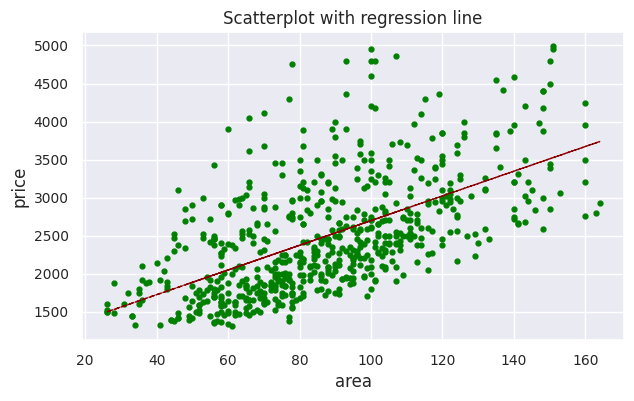

In [291]:
# Subset
df_sub = df.loc[(df.price >= 1000)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.area, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.area, df_sub.price, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.area, 
         b*df_sub.area + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('area', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

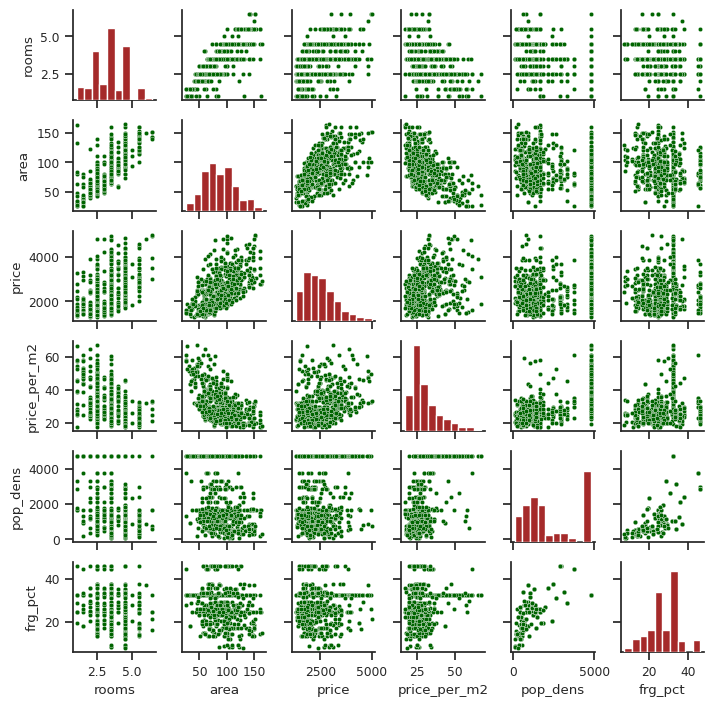

In [292]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Hexagonal binning plot  (matplotlib)

(645, 17)


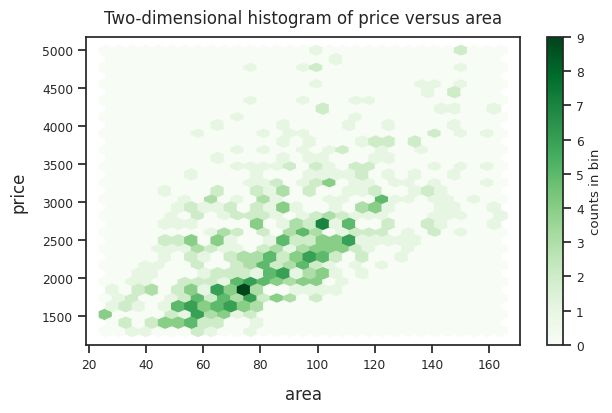

In [293]:
# Subset
df_sub = df.loc[(df.price <= 6000) & (df.area <= 200)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.area, df_sub.price, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('area', fontsize=12, labelpad=10)
plt.ylabel('price', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus area', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Correlation heatmap (seaborn)

<Axes: >

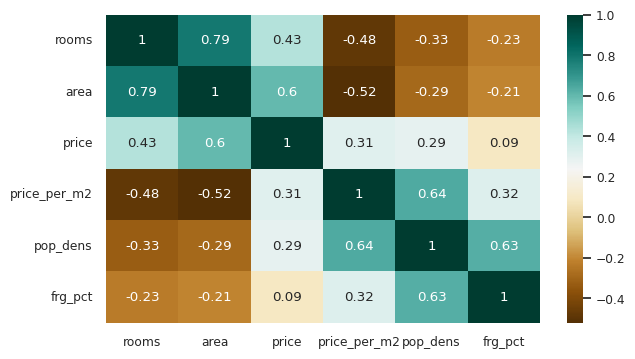

In [294]:
# Set font size for plot
sns.set(font_scale=0.8)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']].corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Bubble plot (seaborn)

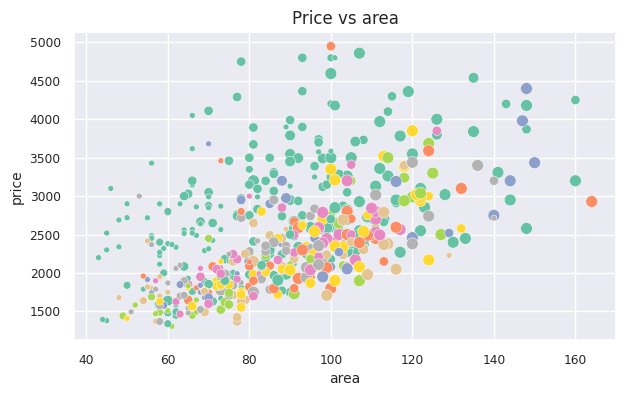

In [295]:
# Subset of df
df_sub = df.loc[(df['rooms'] >= 2.5) & (df['rooms'] <= 4.5)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="area", 
                     y="price",
                     size="rooms", # determines bubble size
                     hue="pop_dens",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs area', fontsize = 12)
ax.set_xlabel('area', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [296]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.2.0-1014-azure
Datetime: 2023-10-13 17:27:22
Python Version: 3.10.13
-----------------------------------
